In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
import tqdm.notebook
from scipy.stats import ttest_ind

In [2]:
%matplotlib inline
sns.set(rc={"figure.dpi":100, 'savefig.dpi':100})
sns.set_context('notebook')

In [3]:
# File paths
LANE_FILE = '../feature_data/lane.txt'
LANE_NORM_FILE = '../feature_data/lane_norm.txt'

LANE_X_FILE = '../feature_data/lane_x.txt'
LANE_Y_FILE = '../feature_data/lane_y.txt'

LANE_NORM_X_FILE = '../feature_data/lane_norm_x.txt'
LANE_NORM_Y_FILE = '../feature_data/lane_norm_y.txt'

LANE_FILE_TEST = '../feature_data/lane_test.txt'
LANE_NORM_FILE_TEST = '../feature_data/lane_norm_test.txt'

MIA_LANE_X = '../feature_data/mia_lane_x.txt'
MIA_LANE_Y = '../feature_data/mia_lane_y.txt'
MIA_LANENORM_X = '../feature_data/mia_lanenorm_x.txt'
MIA_LANENORM_Y = '../feature_data/mia_lanenorm_y.txt'

PIT_LANE_X = '../feature_data/pit_lane_x.txt'
PIT_LANE_Y = '../feature_data/pit_lane_y.txt'
PIT_LANENORM_X = '../feature_data/pit_lanenorm_x.txt'
PIT_LANENORM_Y = '../feature_data/pit_lanenorm_y.txt'

In [4]:
def describe(a, desc):
    print(f"{desc}")
    print(f"min = {np.min(a)}")
    print(f"max = {np.max(a)}")
    print(f"mean = {np.mean(a)}")
    print(f"median = {np.median(a)}")
    print(f"standard deviation = {np.std(a)}\n")
    
def plot_hist(x, y, bins, title, palette, xlbl, ylbl, fname):
    """
    Plots a histogram of the two arrays x and y.
    """
    fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
    sns.set_palette(palette)
    sns.histplot(ax=ax1, x=x, y=y, bins=bins, cbar=True)
    ax1.set_xlabel(xlbl)
    ax1.set_ylabel(ylbl);
    ax1.set_title(title);
    plt.savefig(fname)

In [5]:
def get_lane(path):
    """
    Returns [lane x], [lane y]
    """
    x, y = [], []
    with open(path, "r") as file:
        lines = file.readlines()
        for line in lines:
            line = line.split(',')
            scene_idx = line[0]
            n_lanes = int(line[1])
            # Remove the scene index and number of lanes from the line
            line = line[2:]  
            for i in range(n_lanes * 2):
                if i % 2 == 0:
                    x.append(float(line[i]))
                else:
                    y.append(float(line[i]))
        return x, y
    
def lane_to_txt(path, data):   
    with open(path, 'w') as file:
        iterator = tqdm.notebook.tqdm(data, total=len(data))
        for entry in iterator:
            file.write(str(entry) + '\n')  
            
def lane_from_txt(path):   
    data = []
    with open(path, 'r') as file:
        lines = file.readlines()
        for entry in lines:
            data.append(float(entry))
    return data

# Lane analysis by city (revised, 5/26)

In [6]:
def get_lane_data(path):
    data = []
    with open(path, 'r') as file:
        lines = file.readlines()
        for ln in lines:
            split = ln.split(',')
            for x in split[1:]:
                data.append(float(x))
    return np.array(data)

In [7]:
mx = get_lane_data(MIA_LANE_X)

In [8]:
my = get_lane_data(MIA_LANE_Y)

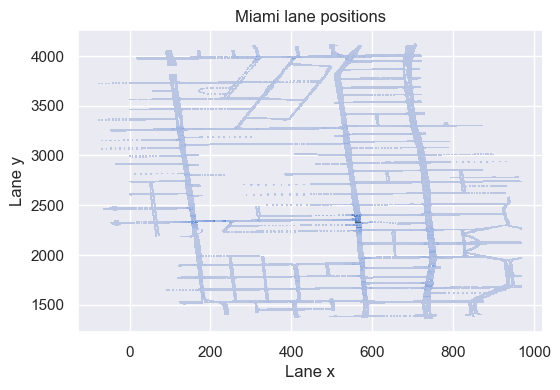

In [10]:
ax = sns.histplot(x=mx, y=my)
ax.set_xlabel('Lane x')
ax.set_ylabel('Lane y')
ax.set_title('Miami lane positions');

In [11]:
px = get_lane_data(PIT_LANE_X)

In [12]:
py = get_lane_data(PIT_LANE_Y)

In [13]:
cities = ['Miami' for i in range(len(mx))] + ['Pittsburgh' for i in range(len(px))]
temp_df = pd.DataFrame({
    'px': np.concatenate((mx, px)),
    'py': np.concatenate((my, py)),
    'city': cities
})

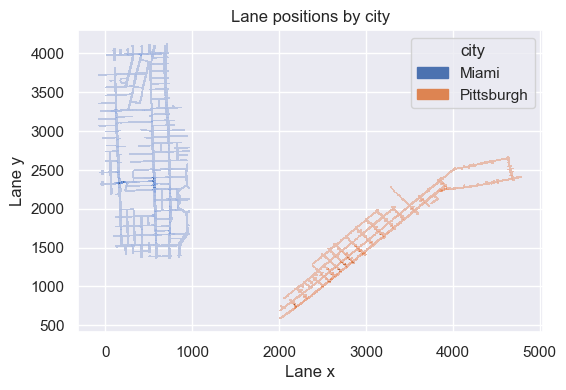

In [14]:
ax = sns.histplot(x='px', y='py', hue='city', data=temp_df);
ax.set_xlabel('Lane x')
ax.set_ylabel('Lane y')
ax.set_title('Lane positions by city');

In [22]:
# describe(mx, 'MIA lane x')
# describe(my, 'MIA lane y')
# describe(px, 'PIT lane x')
# describe(py, 'PIT lane y')

MIA lane x
min = -75.96349
max = 969.7902
mean = 500.4517846119635
median = 560.7048
standard deviation = 222.96810084370296

MIA lane y
min = 1360.4059
max = 4121.429
mean = 2614.622569893664
median = 2365.785
standard deviation = 720.3602063084545

PIT lane x
min = 2006.3577
max = 4791.5786
mean = 3013.315694244276
median = 2862.4128
standard deviation = 574.1660958906876

PIT lane y
min = 587.3421
max = 2668.1353
mean = 1506.5204998374138
median = 1421.2019
standard deviation = 476.59445392168095



In [29]:
mx = get_lane_data(MIA_LANENORM_X)

In [30]:
my = get_lane_data(MIA_LANENORM_Y)

In [31]:
px = get_lane_data(PIT_LANENORM_X)

In [32]:
py = get_lane_data(PIT_LANENORM_Y)

In [33]:
# describe(mx, 'MIA norm x')
# describe(my, 'MIA norm y')
# describe(px, 'PIT norm x')
# describe(py, 'PIT norm y')

MIA norm x
min = -18.56374
max = 18.801159
mean = 0.025657772987880655
median = 0.008366269
standard deviation = 1.6417437623641897

MIA norm y
min = -16.6843
max = 16.68393
mean = 0.010971159411571927
median = -0.006055678
standard deviation = 2.0602313357173236

PIT norm x
min = -15.440532
max = 15.426192
mean = -0.23655018063032596
median = -0.5256006
standard deviation = 2.7419182776314552

PIT norm y
min = -16.691183
max = 16.701883
mean = -0.22286576904037084
median = -0.40712926
standard deviation = 2.4416150548613764



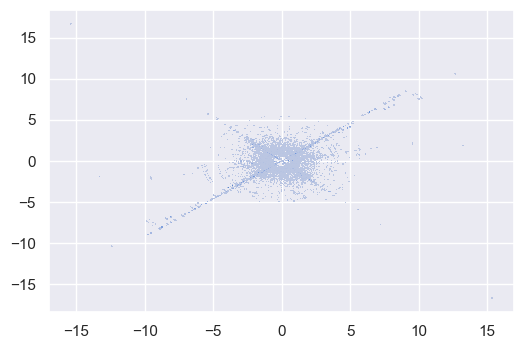

In [39]:
sns.histplot(x=px, y=py);

# Lane positions (train)

In [ ]:
x = lane_from_txt(LANE_X_FILE)

In [ ]:
y = lane_from_txt(LANE_Y_FILE)

In [ ]:
describe(x, 'lane x positions')

In [ ]:
describe(y, 'lane y positions')

In [ ]:
sns.histplot(x=y);

In [ ]:
bins = 1000
x_label, y_label = 'lane_x', 'lane_y'
title = 'Lane positions (train)'
palette = 'Reds'
fname = './milestone_images/laneTrain'
plot_hist(x, y, bins, title, palette, x_label, y_label, fname)

# Lane norms (train)

In [ ]:
x = lane_from_txt(LANE_NORM_X_FILE)

In [ ]:
y = lane_from_txt(LANE_NORM_Y_FILE)

In [ ]:
describe(x, 'lane x norm')

In [ ]:
describe(y, 'lane y norm')

In [ ]:
bins = 1000
x_label, y_label = 'lane_x', 'lane_y'
title = 'Lane norm (test)'
palette = 'Reds'
fname = './milestone_images/laneNormTrain'
plot_hist(x, y, bins, title, palette, x_label, y_label, fname)

# Lane positions (test)

In [ ]:
x, y = get_lane(LANE_FILE_TEST)

In [ ]:
bins = 1000
x_label, y_label = 'lane_x', 'lane_y'
title = 'Lane positions (test)'
palette = 'Reds'
fname = './milestone_images/laneTest'
plot_hist(x, y, bins, title, palette, x_label, y_label, fname)

# Lane norms (test)

In [ ]:
x, y = get_lane(LANE_NORM_FILE_TEST)

In [ ]:
bins = 1000
x_label, y_label = 'lane_x', 'lane_y'
title = 'Lane norm (test)'
palette = 'Reds'
fname = './milestone_images/laneNormTest'
plot_hist(x, y, bins, title, palette, x_label, y_label, fname)